In [ ]:
import pandas as pd
df = pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [ ]:
X = df.drop(columns=["play"])
y = df["play"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9, 5)

(5, 5)

(9,)

(5,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
model = DecisionTreeClassifier(criterion='entropy',random_state=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Y prediciton:',y_pred)

Y prediciton: [1 0 1 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',conf_mat)
Accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',Accuracy)

Confusion Matrix: [[1 2]
 [1 1]]
Accuracy: 0.4


<Axes: xlabel='Predicted', ylabel='Actual'>

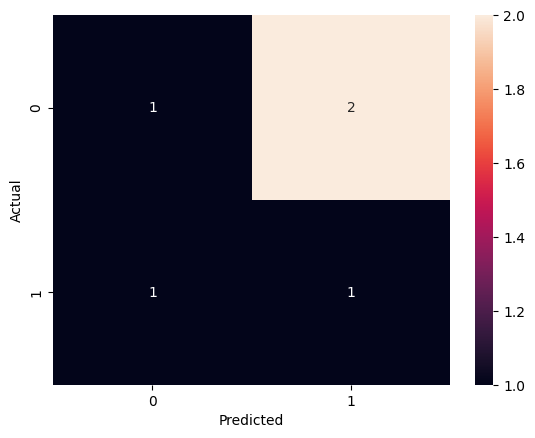

In [ ]:
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True)